In [104]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy
import sklearn.datasets

In [105]:
X,y = sklearn.datasets.make_moons(200, noise = 0.20)

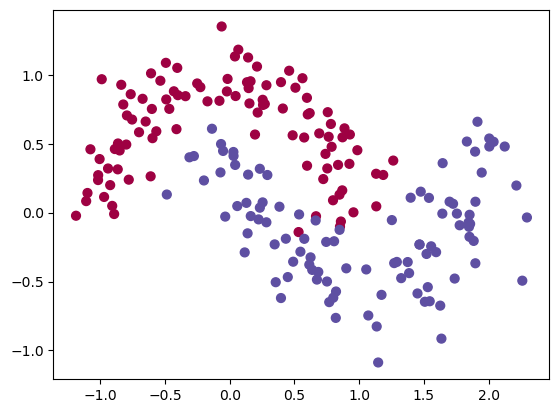

In [106]:
plt.scatter(X[ : , 0] , X[: , 1] ,  s = 40  , c = y,  cmap = plt.cm.Spectral)

In [107]:
X = torch.FloatTensor(X)
y = torch.LongTensor(y)

In [108]:
class FeedForward(nn.Module):
    def __init__(self,inputNeurons , hiddenNeurons , OutputNeurons):
        super(FeedForward , self).__init__()
        self.hidden = nn.Linear(inputNeurons , hiddenNeurons)
        self.out = nn.Linear(hiddenNeurons , OutputNeurons)
    def forward(self , X):
        X = self.hidden(X)
        X = F.relu(X)
        X = self.out(X)
        return X

In [109]:
network = FeedForward(2,50,2)
optimizer = torch.optim.SGD(network.parameters() , lr = 0.02)
loss_function = nn.CrossEntropyLoss()

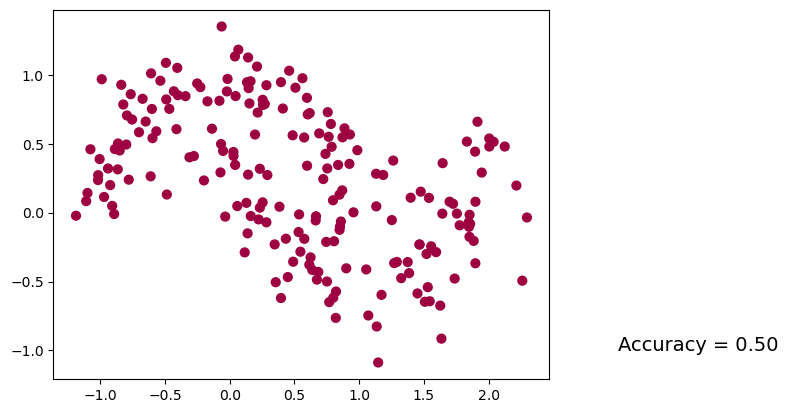

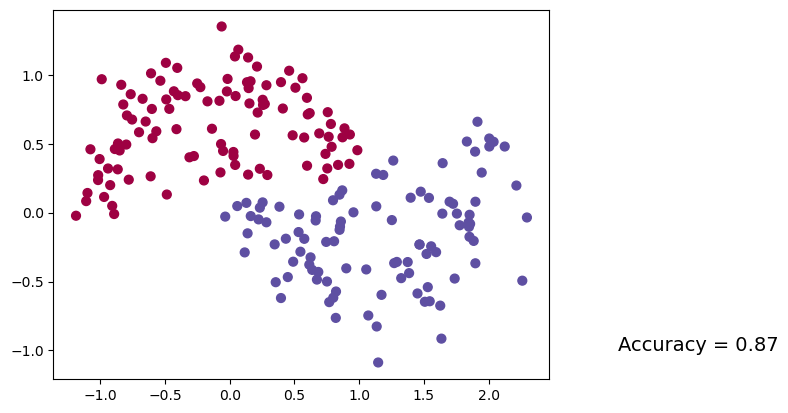

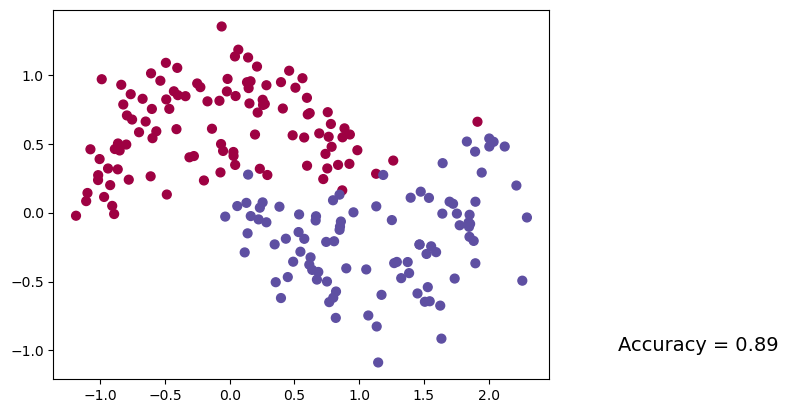

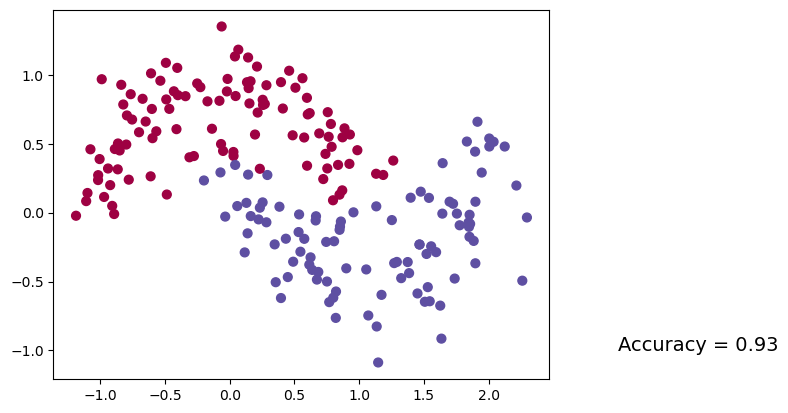

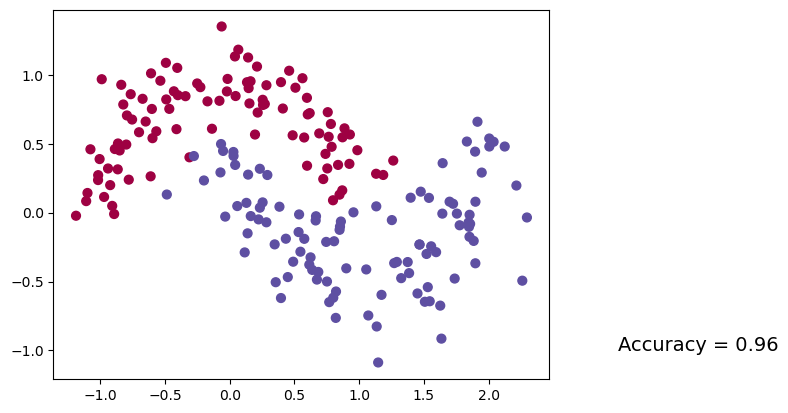

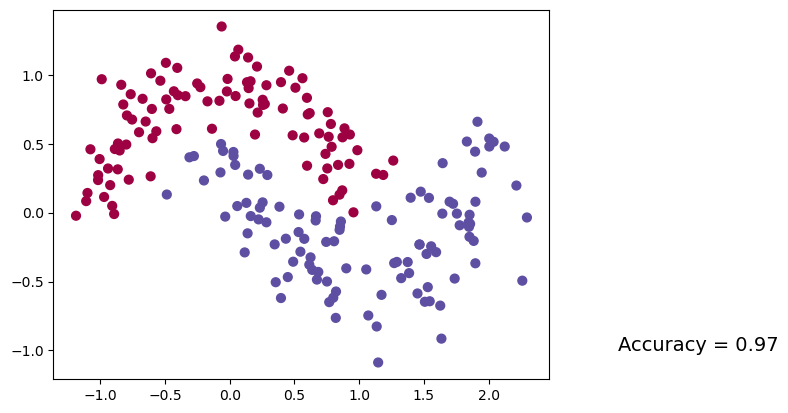

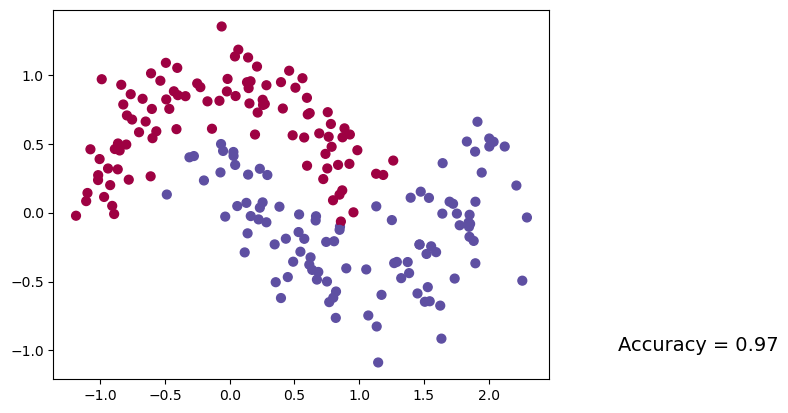

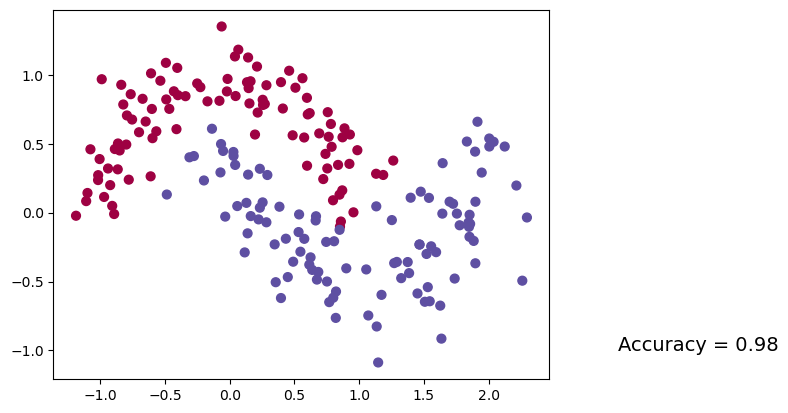

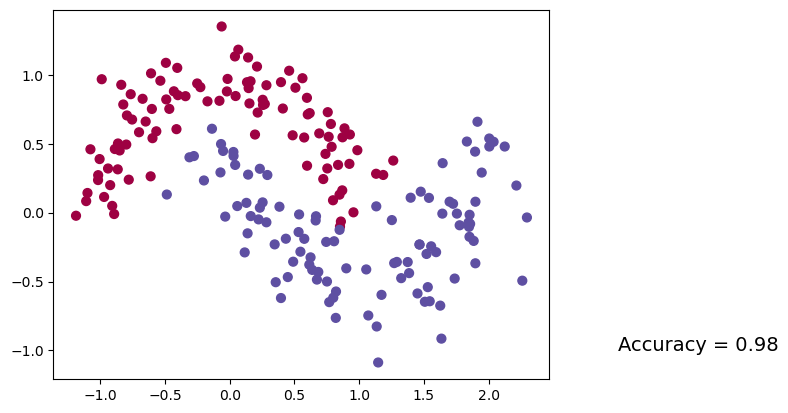

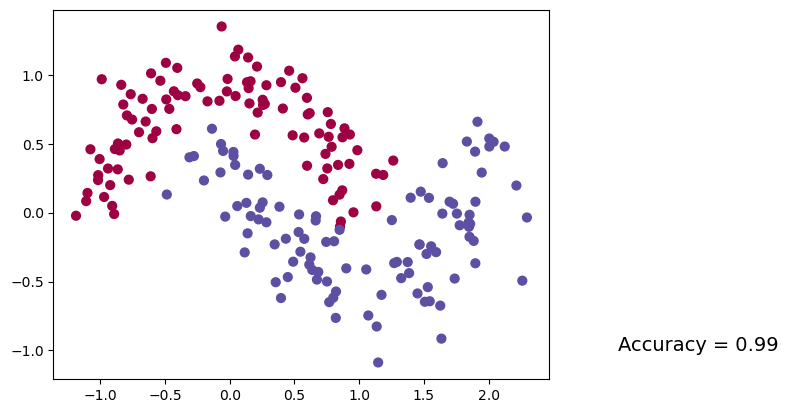

<function matplotlib.pyplot.ioff() -> 'ExitStack'>

In [110]:
plt.ion
for epoch in range(10000):
    out = network(X)
    loss = loss_function(out,y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:

        max_value , prediction = torch.max(out , 1)
        prediction_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(X.data.numpy()[ : , 0] , X.data.numpy()[: , 1] ,  s = 40  , c = prediction_y,  cmap = plt.cm.Spectral) 
        accuracy = (prediction_y == target_y).mean()
        plt.text(3,-1, 'Accuracy = {:.2f}'.format(accuracy), fontdict = {'size':14})
        plt.pause(0.1)
plt.ioff